In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('dataset/viajes_surfistas.csv')
df

,homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
0,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
1,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.022100,-118.481000
2,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.030400,-118.779000
3,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
4,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.888889,-118.405278
...,...,...,...,...,...,...,...,...,...
9506,"Bridgetown, Western Australia",Australia,Australia,-33.954448,116.131214,Australia,Australia,-34.225000,115.017000
9507,"Lille, France",Europe,France,50.629250,3.057256,Europe,France,45.002343,-1.201475
9508,MX,South America,Mexico,23.634501,-102.552784,South America,Mexico,21.016700,-101.250000
9509,Kuta - Bali - Indonesia,Asia,Indonesia,-8.739184,115.171130,Asia,Indonesia,-8.710093,115.166845


In [3]:
agrupado = df.groupby('homecountry').agg({
    'homename' : 'count'
})
agrupado

,homename
homecountry,
Andorra,1
Argentina,143
Australia,809
Austria,3
Bahrain,2
...,...
United States Virgin Islands,2
United States of America,2826
Uruguay,21


In [4]:
agrupado_ordenado = agrupado.sort_values('homename', ascending = False)
agrupado_ordenado

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752
United Kingdom,496
...,...
Nepal,1
Oman,1
Pakistan,1


In [5]:
top_4 = agrupado_ordenado.head(4)
top_4

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752


In [6]:
df_otros = agrupado_ordenado.drop(index = top_4.index.values)
df_otros

,homename
homecountry,
United Kingdom,496
France,433
Brazil,379
Portugal,367
Italy,295
...,...
Nepal,1
Oman,1
Pakistan,1


In [7]:
df_otros['pais'] = 'Otros'
df_otros

,homename,pais
homecountry,,
United Kingdom,496,Otros
France,433,Otros
Brazil,379,Otros
Portugal,367,Otros
Italy,295,Otros
...,...,...
Nepal,1,Otros
Oman,1,Otros
Pakistan,1,Otros


In [8]:
df_otros_agrupados = df_otros.groupby('pais').agg({
    'homename' : 'sum'
})
df_otros_agrupados

,homename
pais,
Otros,4231


In [9]:
df_otros_agrupado = df_otros_agrupados.reset_index()
df_otros_agrupado

,pais,homename
0,Otros,4231


In [10]:
top_4 = top_4.reset_index()
top_4

,homecountry,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [11]:
top_4.columns = ['pais', 'homename']
top_4

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [12]:
df_final = pd.concat([top_4, df_otros_agrupado])
df_final

,pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752
0,Otros,4231


In [13]:
df_final = df_final.set_index('pais')
df_final

,homename
pais,
United States of America,2826
Japan,893
Australia,809
Spain,752
Otros,4231


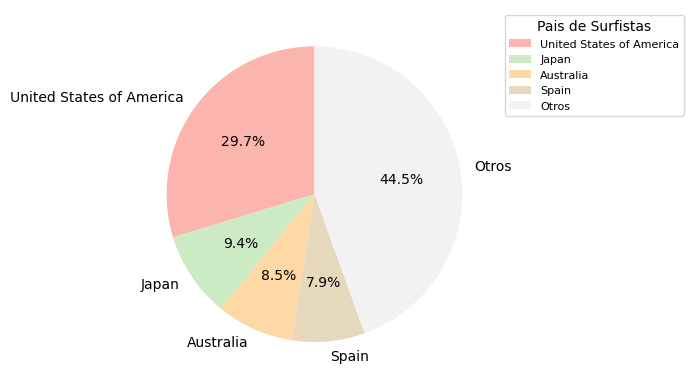

In [14]:
ax = df_final.plot.pie(
    y = 'homename',
    startangle = 90,
    autopct = '%1.1f%%',
    colormap = 'Pastel1'
)

ax.set_ylabel('')

ax.legend(
    title = 'Pais de Surfistas',
    bbox_to_anchor = (1, 1),
    fontsize = 8
)